In [6]:
import pandas as pd
import numpy as np

In [10]:
data=pd.read_csv("heights.csv")
print (data)

       name  height
0     mohan     1.2
1     maria     4.6
2     sakib     4.9
3       tao     5.1
4     virat     5.2
5    khusbu     5.4
6    dmitry     5.5
7    selena     5.5
8      john     5.6
9     imran     5.6
10     jose     5.8
11  deepika     5.9
12   yoseph     6.0
13    binod     6.1
14  gulshan     6.2
15  johnson     6.5
16   donald     6.6
17    aamir     7.1
18      ken     7.1
19      Liu    40.2


In [17]:
q1=data["height"].quantile(.25)
q2=data["height"].quantile(.50)
q3=data["height"].quantile(.75)
q1,q2,q3

(np.float64(5.3500000000000005),
 np.float64(5.699999999999999),
 np.float64(6.275))

In [20]:
iqr=q3-q1
iqr

np.float64(0.9249999999999998)

In [23]:
lower=q1- iqr*(1.5)
higher=q3 + iqr*(1.5)
lower,higher

(np.float64(3.962500000000001), np.float64(7.6625))

In [29]:
outlier= data[ (data["height"] < lower ) | (data["height"]>higher)]
outlier

,name,height
0,mohan,1.2
19,Liu,40.2


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# make sure to install openpyxl using "pip install openpyxl" before running below code
df = pd.read_excel("region_wise_sales.xlsx")
df

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956
5,June,2022,APAC,38143
6,July,2022,APAC,29132
7,August,2022,APAC,21961
8,September,2022,APAC,33299
9,October,2022,APAC,37279


APAC -737.125 59747.875
        Month  Year Region  Sales
0     January  2022   APAC  36750
1    February  2022   APAC  36995
2       March  2022   APAC  18579
3       April  2022   APAC  37768
4         May  2022   APAC  23956
5        June  2022   APAC  38143
6        July  2022   APAC  29132
7      August  2022   APAC  21961
8   September  2022   APAC  33299
9     October  2022   APAC  37279
10   November  2022   APAC  21388
11   December  2022   APAC  21896
Americas 16832.375 38473.375
        Month  Year    Region  Sales
24    January  2022  Americas  30247
25   February  2022  Americas  29284
26      March  2022  Americas  27904
27      April  2022  Americas  23407
28        May  2022  Americas  23716
29       June  2022  Americas  25077
30       July  2022  Americas  33649
31     August  2022  Americas  24560
32  September  2022  Americas  34102
33    October  2022  Americas  28257
34   November  2022  Americas  30691
35   December  2022  Americas  29387
Europe 7306.875 17665.87

C:\Users\M.Zaid Naeem\AppData\Local\Temp\ipykernel_8252\4108111021.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=labels, vert=True, patch_artist=True)


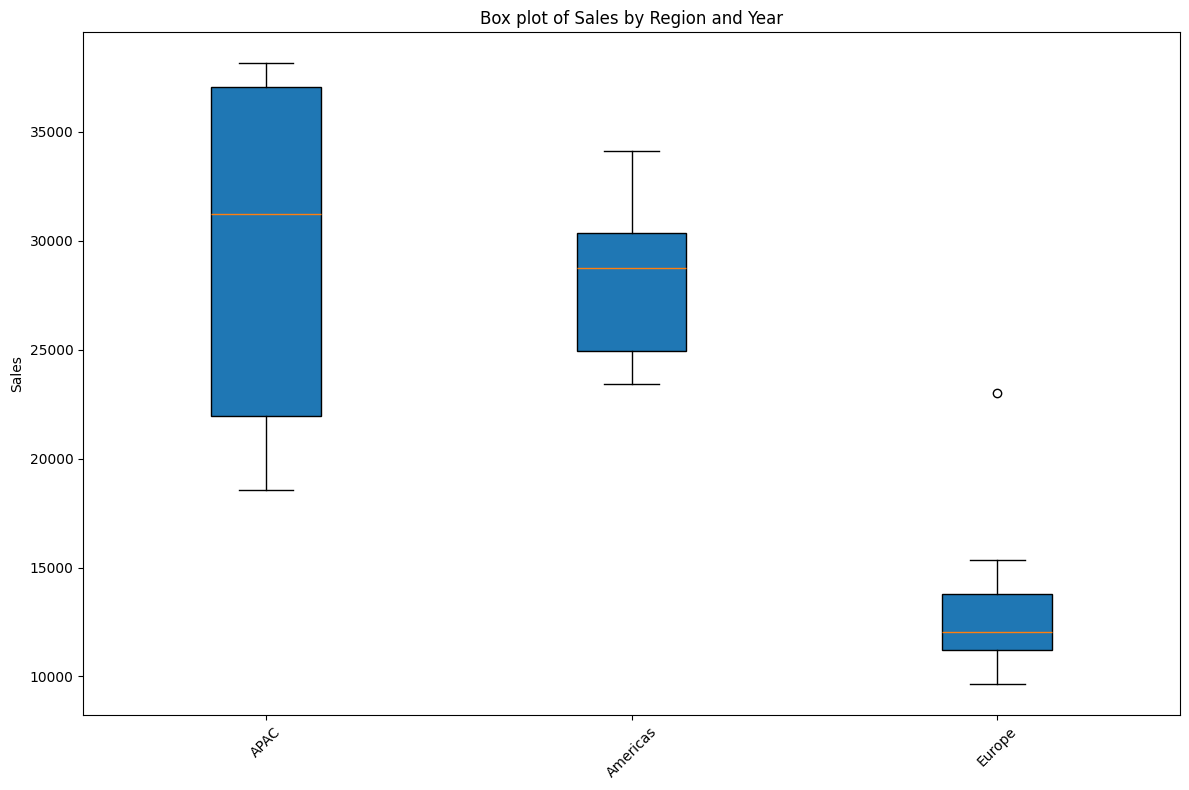

In [79]:
g=df.groupby("Region")

plot_data=[]
labels=[]

for x,value in g:
    value=value.dropna()
    iqr= value["Sales"].quantile(0.75) - value["Sales"].quantile(0.25)
    lower=value["Sales"].quantile(0.25)- iqr*1.5
    higher=value["Sales"].quantile(0.75)+ iqr*1.5
    print(x,lower,higher)
    print(value[(value["Sales"] > lower) & (value["Sales"]< higher)])
    plot_data.append(value["Sales"])
    labels.append(x)
    

plt.figure(figsize=(12, 8))
plt.boxplot(plot_data, labels=labels, vert=True, patch_artist=True)
plt.title('Box plot of Sales by Region and Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
    
